In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [44]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#import data
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#drop useless  colimns
data.drop("Unnamed: 32",axis = 1 ,inplace =True)
data.drop("id",axis = 1 ,inplace =True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
for i  in range(len(data.columns)):
    print(i , " ",data.columns[i]  )

0   diagnosis
1   radius_mean
2   texture_mean
3   perimeter_mean
4   area_mean
5   smoothness_mean
6   compactness_mean
7   concavity_mean
8   concave points_mean
9   symmetry_mean
10   fractal_dimension_mean
11   radius_se
12   texture_se
13   perimeter_se
14   area_se
15   smoothness_se
16   compactness_se
17   concavity_se
18   concave points_se
19   symmetry_se
20   fractal_dimension_se
21   radius_worst
22   texture_worst
23   perimeter_worst
24   area_worst
25   smoothness_worst
26   compactness_worst
27   concavity_worst
28   concave points_worst
29   symmetry_worst
30   fractal_dimension_worst


In [5]:
#declare x,y 
y = data.iloc[:,0].values
x= data.iloc[:,1:].values

<BarContainer object of 2 artists>

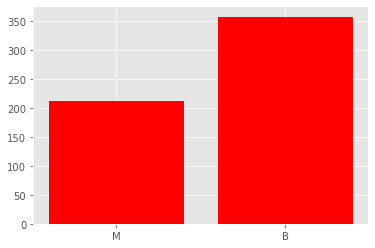

In [40]:
#visulaize diagnosis
y_m,y_b = 0,0
for i in y :
    if i == "M" :
        y_m += 1 
    else :
        y_b  += 1
plt.bar(["M","B"],[y_m,y_b],color = "r")

In [43]:
#same size
print(len(y))
print(len(x))

569
569


In [7]:
#split data
x_train,x_test,y_train,y_test =  train_test_split(x,y ,test_size = 0.25)

In [8]:
#scalling x_train,x_test
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [10]:
#search for best parameters
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
leaf_size=[10,20,30,40,50,60]
p=[1,2,3,4,5] 
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']

param_grid = dict(n_neighbors = k_range, weights = weight_options,algorithm= algorithm ,leaf_size = leaf_size , p =p)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x,y)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9402882205513784
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=10, n_neighbors=4, p=1, weights='distance')


In [53]:
#build model
knn = KNeighborsClassifier(leaf_size=10, n_neighbors=4, p=1, weights='distance')

In [54]:
#fit model
model = knn.fit(x_train,y_train)

In [55]:
#predict x_test
y_pred = knn.predict(x_test)

In [56]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[95  1]
 [ 2 45]]


In [19]:
#get accuracy
acc =  accuracy_score(y_test,y_pred)
print(acc)

[[95  1]
 [ 2 45]]
0.9790209790209791


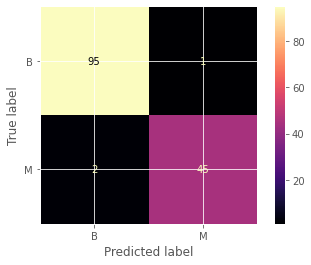

In [51]:
#confusion matrix
plot_confusion_matrix(model,x_test,y_test,cmap='magma')

In [ ]:
#save modeel
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)